In [ ]:
#Banking customer churn 

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [3]:
# Load the dataset
df= pd.read_csv("D:/DATA/Churn_Modelling.csv")

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Finding Missing Values

In [6]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


Dropping Insignificant Features

In [7]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8176,8177,15800811,Wan,702,France,Male,40,3,148556.74,1,0,1,146056.29,0
3228,3229,15693264,Onyinyechukwuka,583,France,Female,29,10,0.00,2,1,1,111285.85,0
7339,7340,15670646,Moore,499,Spain,Female,42,0,147187.84,1,1,1,14868.94,1
8972,8973,15718780,Cox,650,Spain,Female,32,4,79450.09,1,1,1,118324.75,0
5242,5243,15662751,Piazza,655,Germany,Female,40,0,81954.60,1,1,1,198798.44,1


In [8]:
#RowNumber and CustomerId columns represents a unique value for each customer
#Surname also do not seems to have any relevancy
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)


In [9]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Remaning

In [10]:
df.rename(columns={"Exited":"Churned"},inplace=True)

In [11]:
df["Churned"].replace({0:"No",1:"Yes"},inplace=True)

In [12]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,No
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,No
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,Yes
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,Yes


EDA


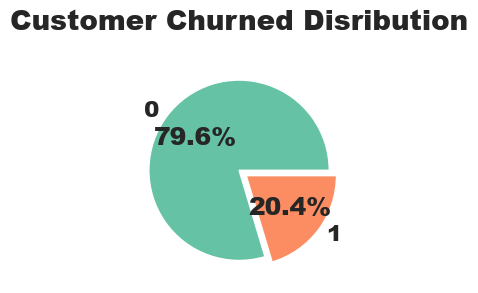

In [52]:
count = df["Churned"].value_counts()



plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)
plt.show()


In [17]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="Churned",palette="Set2")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)

    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()

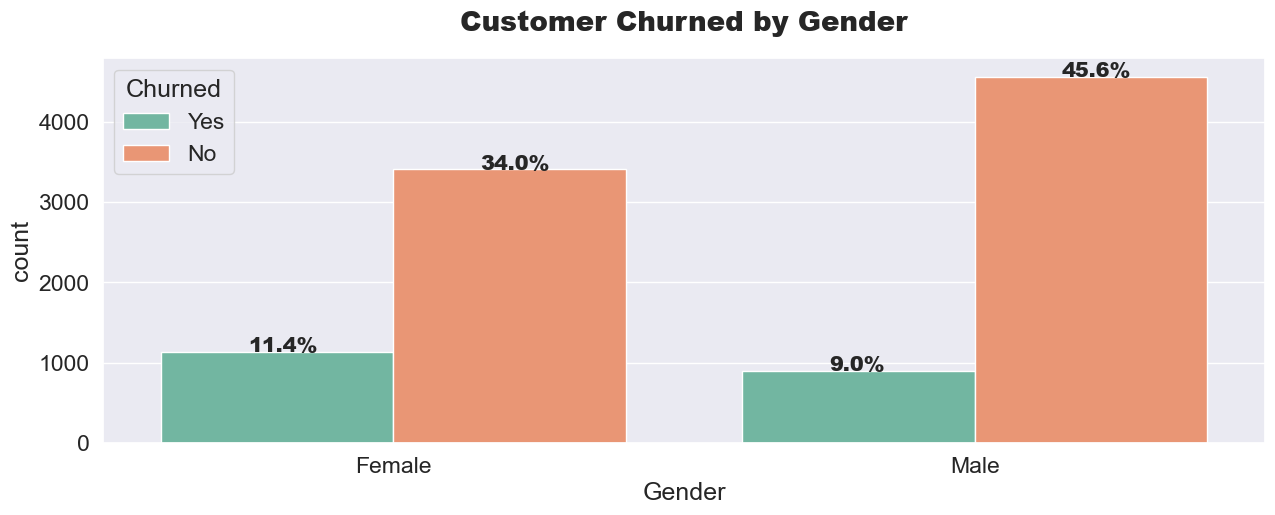

In [19]:
countplot("Gender")

In [20]:
#The churned probabillity is more for Feamle Customers compared to male customers

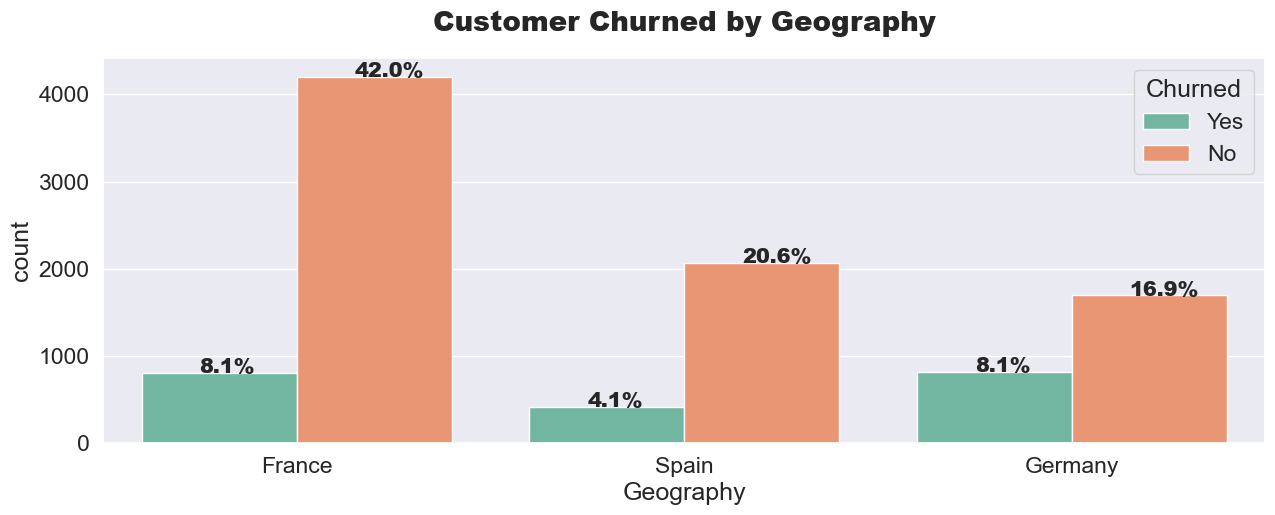

In [21]:
countplot("Geography")

In [22]:
#Despite of the huge total customers difference between France & Germany the churned rate for France and Germany customers are same.

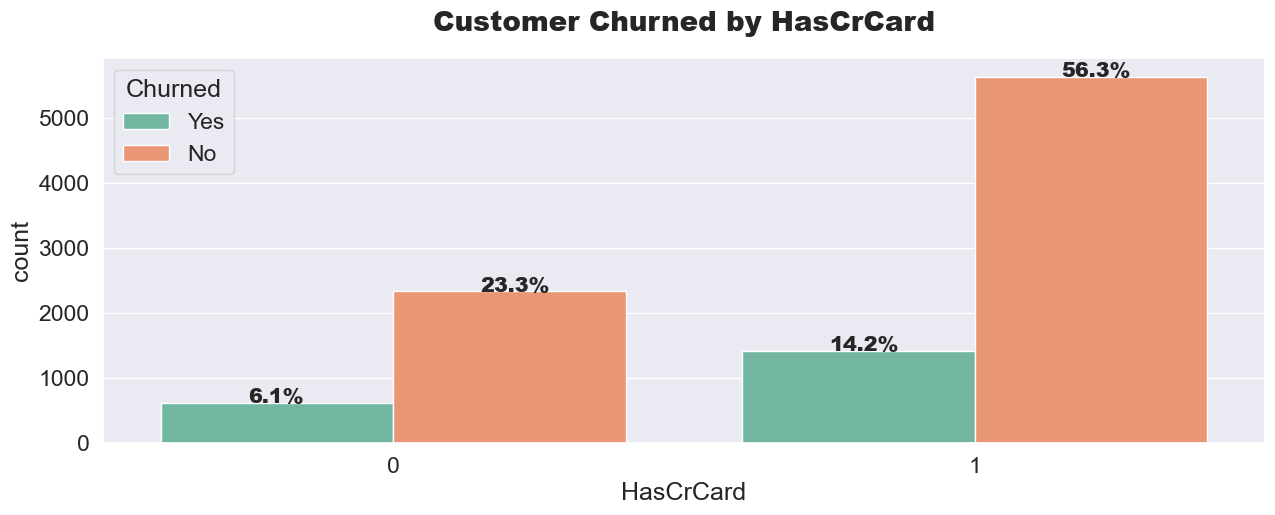

In [23]:
countplot("HasCrCard")

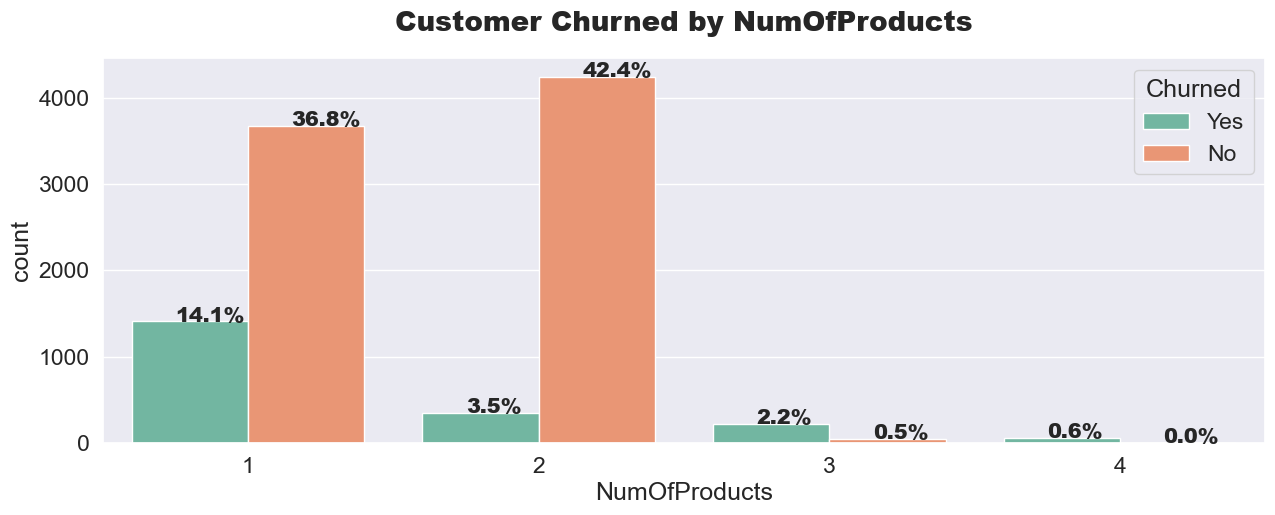

In [24]:
countplot("NumOfProducts")

In [25]:
#Most of the customers are having either 1 or 2 total number of banking products.
#The lowest churn rate is with customers having only 2 products.

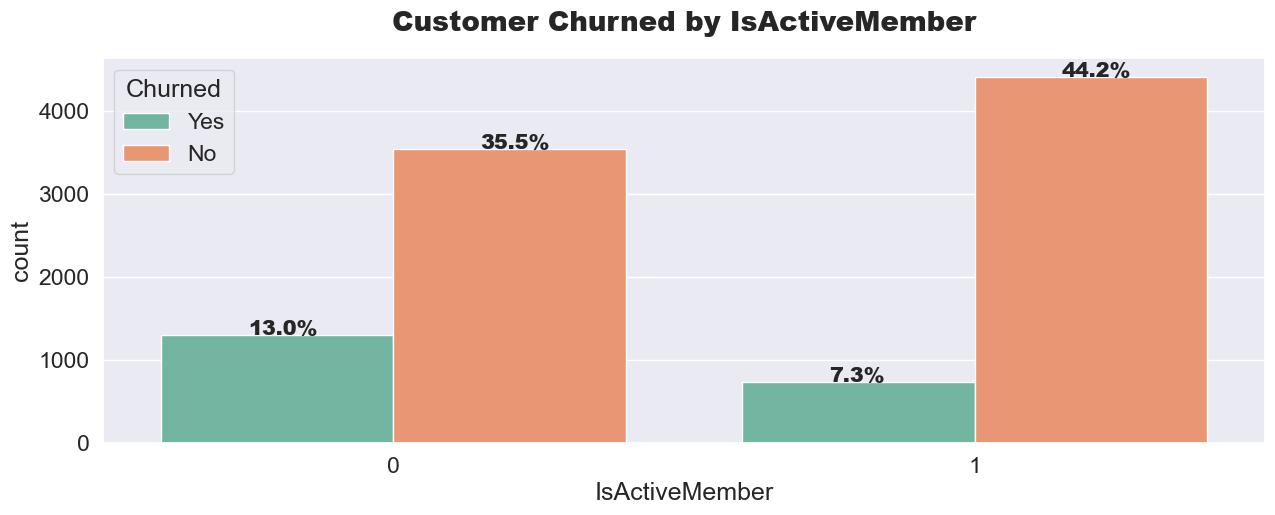

In [26]:
countplot("IsActiveMember")

In [27]:
#There is approxiamately equal customer who are either active or not active.
#But the churn rate % in not active customers is almost double compared to active customers.
#So customers which are not active are morely likely to deactivate their banking facilities

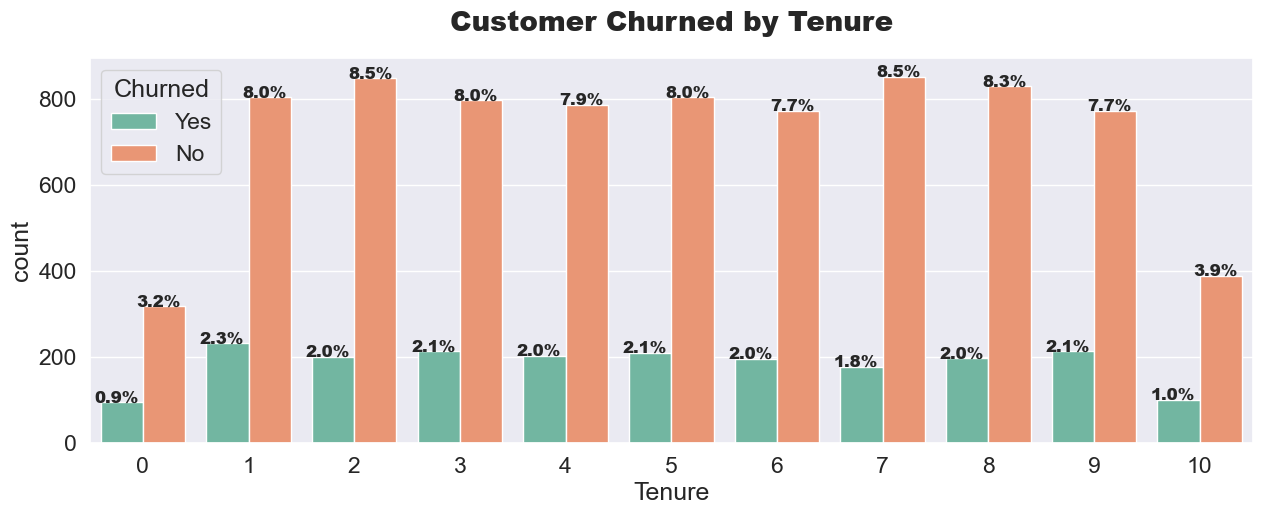

In [28]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x="Tenure", data=df, hue="Churned",palette="Set2")
for value in ax.patches:
    percentage = "{:.1f}%".format(100*value.get_height()/len(df["Tenure"]))
    x = value.get_x() + value.get_width() / 2 - 0.05
    y = value.get_y() + value.get_height()
    ax.annotate(percentage, (x,y), fontweight="black",size=12, ha="center")

plt.title("Customer Churned by Tenure",fontweight="black",size=20,pad=20)
plt.show()

Feature Engineering

In [29]:
conditions = [(df["NumOfProducts"]==1), (df["NumOfProducts"]==2), (df["NumOfProducts"]>2)]
values =     ["One product","Two Products","More Than 2 Products"]

In [30]:
df["Total_Products"] = np.select(conditions,values)

In [31]:
df.drop(columns="NumOfProducts", inplace=True)

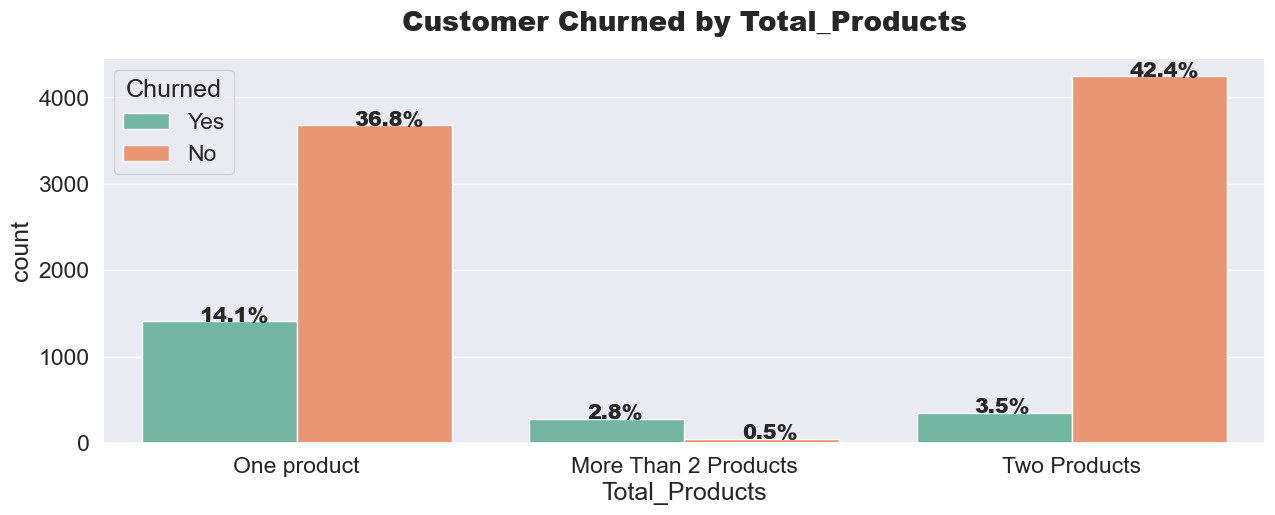

In [32]:
countplot("Total_Products")

In [33]:
conditions = [(df["Balance"]==0), (df["Balance"]>0)]
values = ["Zero Balance","More Than zero Balance"]

In [34]:
df["Account_Balance"] = np.select(conditions, values)

In [35]:
df.drop(columns="Balance",inplace=True)

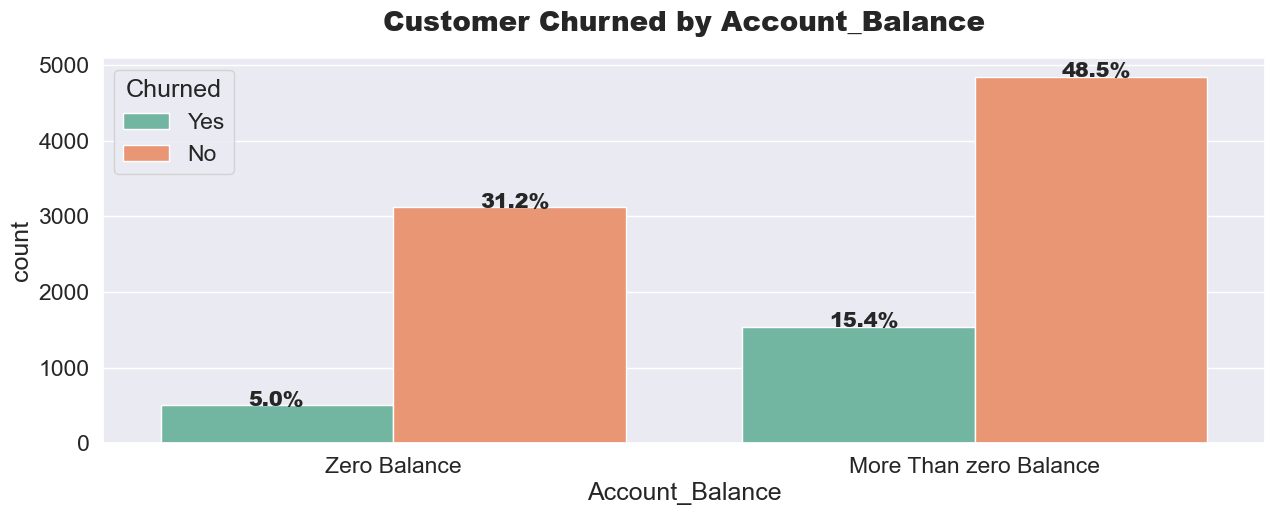

In [36]:
countplot("Account_Balance")

Performing One Hot Encoding on Categorical Features

In [37]:
cat_cols = ["Geography","Gender","Total_Products","Account_Balance"]

In [38]:
df = pd.get_dummies(columns=cat_cols, data=df)

In [40]:
df["Churned"].replace({"No":0,"Yes":1},inplace=True)

In [41]:
df

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More Than zero Balance,Account_Balance_Zero Balance
0,619,42,2,1,1,101348.88,1,1,0,0,1,0,0,1,0,0,1
1,608,41,1,0,1,112542.58,0,0,0,1,1,0,0,1,0,1,0
2,502,42,8,1,0,113931.57,1,1,0,0,1,0,1,0,0,1,0
3,699,39,1,0,0,93826.63,0,1,0,0,1,0,0,0,1,0,1
4,850,43,2,1,1,79084.10,0,0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,1,0,96270.64,0,1,0,0,0,1,0,0,1,0,1
9996,516,35,10,1,1,101699.77,0,1,0,0,0,1,0,1,0,1,0
9997,709,36,7,0,1,42085.58,1,1,0,0,1,0,0,1,0,0,1
9998,772,42,3,1,0,92888.52,1,0,1,0,0,1,0,0,1,1,0


Splitting Data For Model Training & Testing

In [42]:
X = df.drop(columns=["Churned"])
y = df["Churned"]

In [43]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [44]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (8000, 16)
Shape of x_test is:  (2000, 16)
Shape of y_train is: (8000,)
Shape of y_test is:  (2000,)


<h2>Decision Tree

In [45]:
dtree = DecisionTreeClassifier()

In [46]:
param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "max_features":["auto",None],
              "random_state":[0,42]}

In [48]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

In [53]:
best_parameters = grid_search.best_params_

print("Best Parameters for DecisionTree Model is:\n\n")
best_parameters


Best Parameters for DecisionTree Model is:




{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': None,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'random_state': 0,
 'splitter': 'random'}

In [54]:
dtree = DecisionTreeClassifier(**best_parameters)

dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       min_samples_split=7, random_state=0, splitter='random')

In [57]:
y_train_pred = dtree.predict(x_train)
y_test_pred = dtree.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 86.68 %
Accuracy Score of Model on Testing Data  is => 86.15 %


In [58]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))

F1 Score of the Model is => 0.8615
Recall Score of the Model is => 0.8615
Precision Score of the Model is => 0.8615


In [59]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":dtree.feature_importances_})

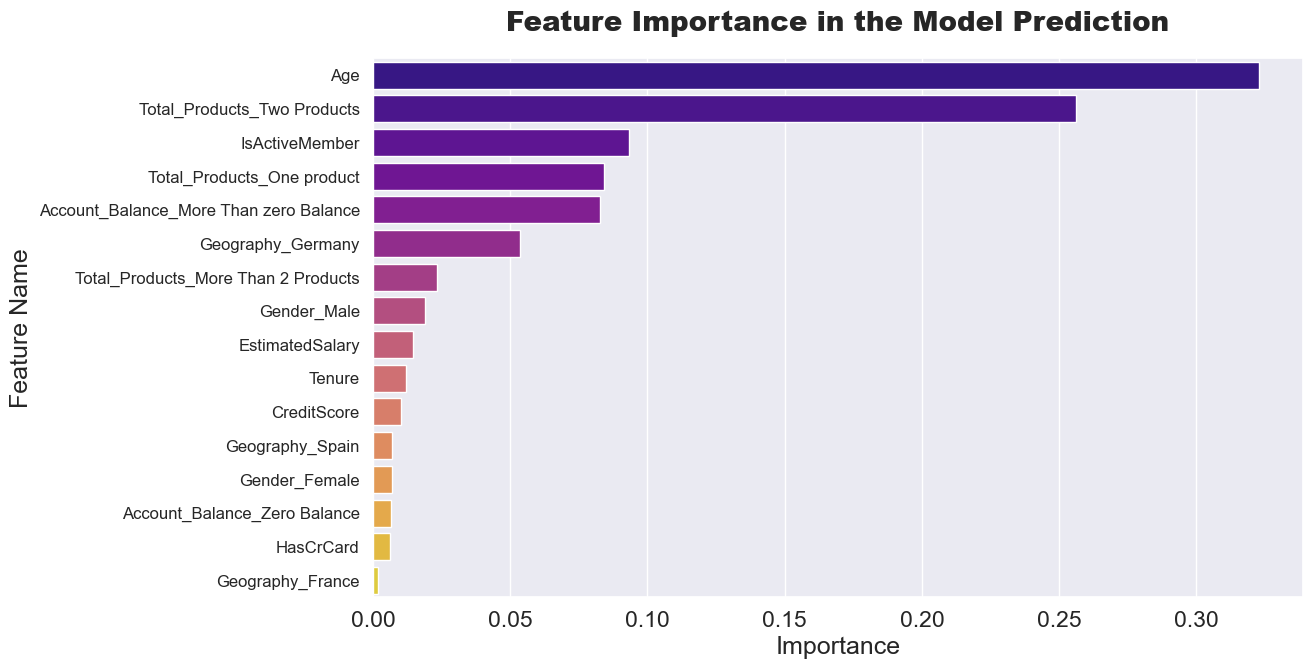

In [77]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

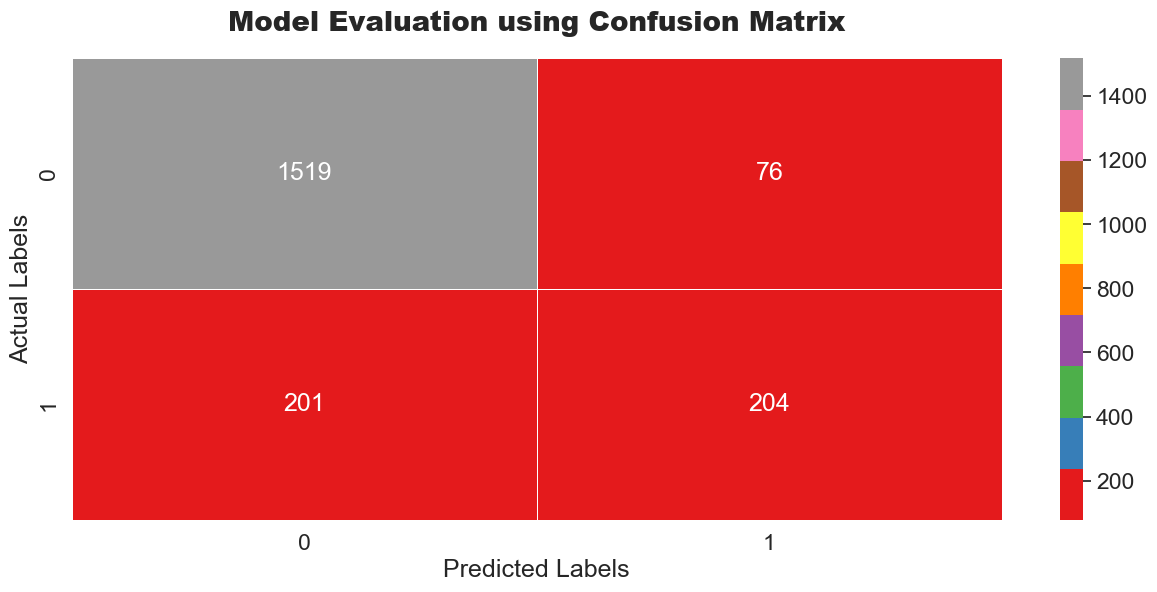

In [63]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

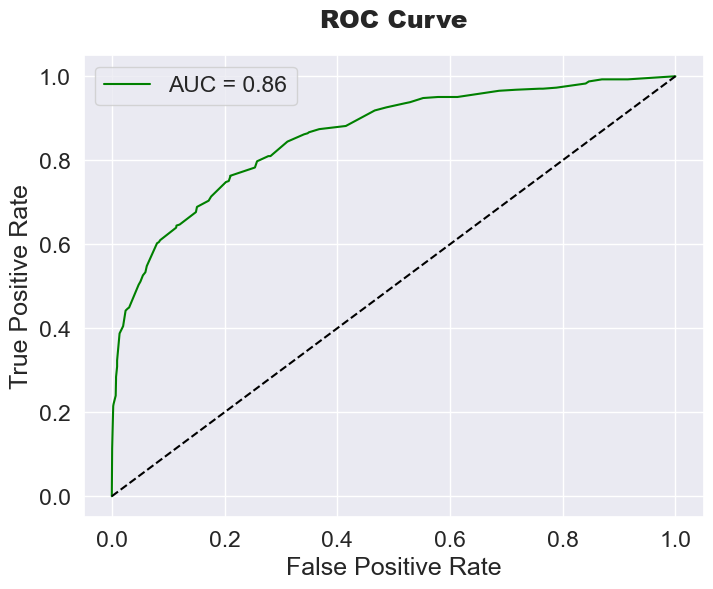

In [64]:
y_pred_proba = dtree.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()

In [65]:
#An AUC (Area Under the Curve) value of 0.86 suggests that the model has strong discriminative power.


<h2>RandomForest

In [84]:
rfc = RandomForestClassifier()

In [85]:
param_grid = {"max_depth":[3,4,5],
              "min_samples_split":[3,4,5],
              "min_samples_leaf":[3,4,5],
              "n_estimators": [50,70]}

In [86]:
grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [50, 70]})

In [88]:
best_parameters = grid_search.best_params_

print("Best Parameters for RandomForest Model is:\n\n")
best_parameters

Best Parameters for RandomForest Model is:




{'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 70}

In [89]:
rfc = RandomForestClassifier(**best_parameters)

rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=70)

In [90]:
y_train_pred = rfc.predict(x_train)
y_test_pred  = rfc.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 85.58 %
Accuracy Score of Model on Testing Data  is => 85.7 %


In [91]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))

F1 Score of the Model is => 0.857
Recall Score of the Model is => 0.857
Precision Score of the Model is => 0.857


In [92]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":rfc.feature_importances_})

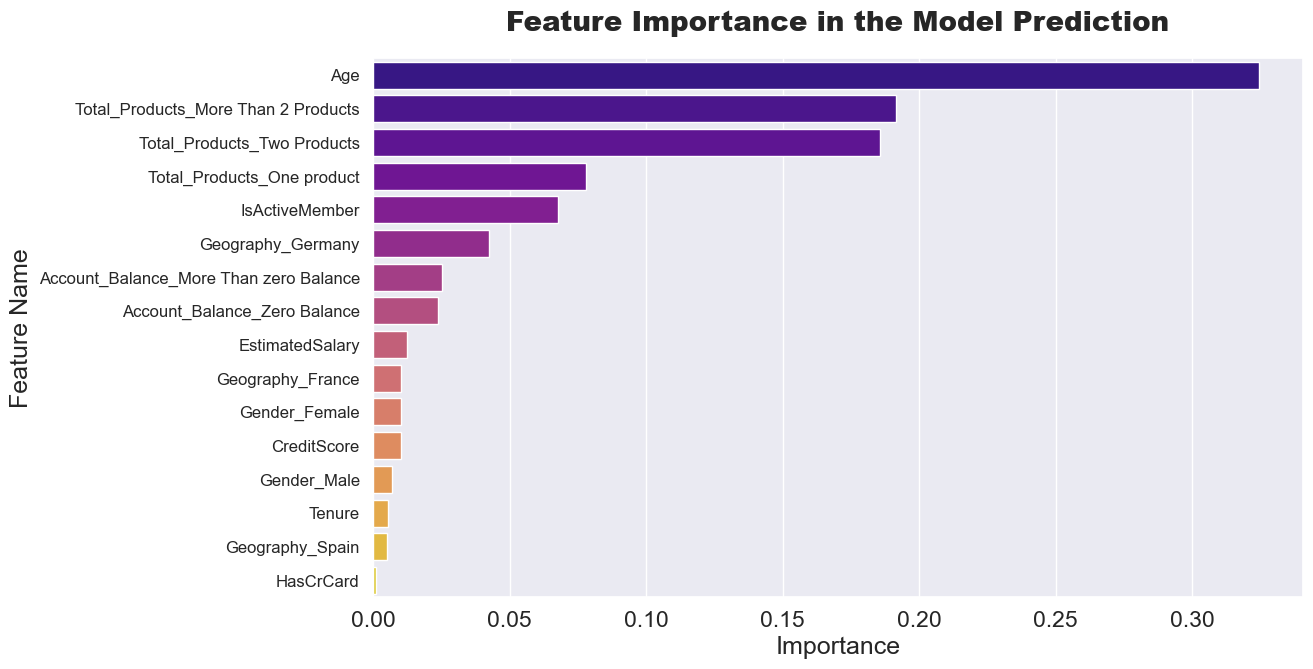

In [93]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

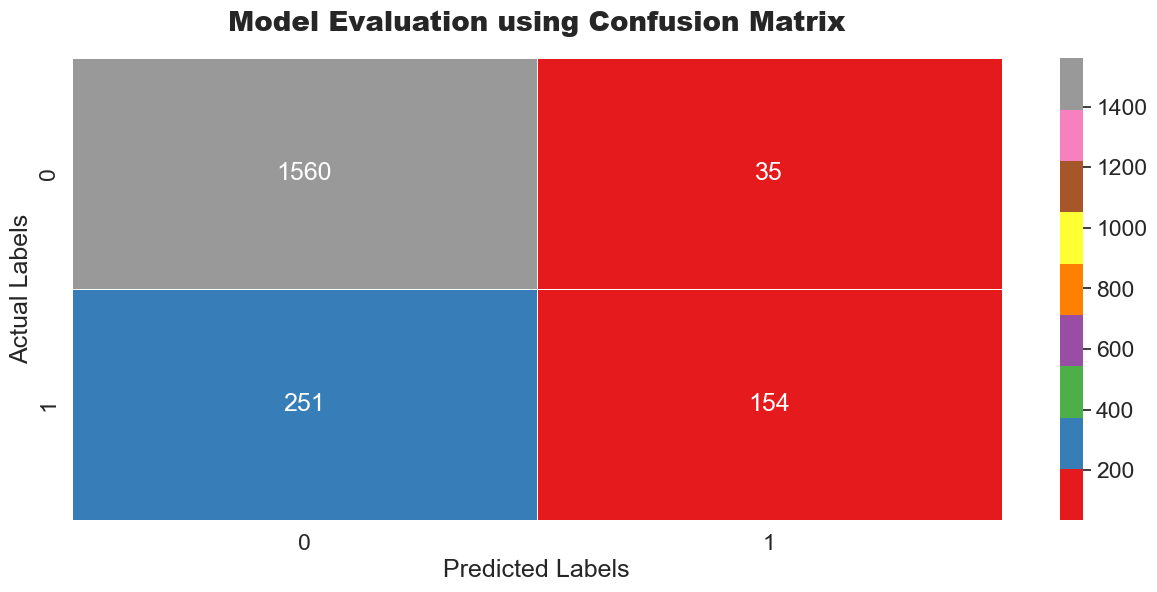

In [95]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

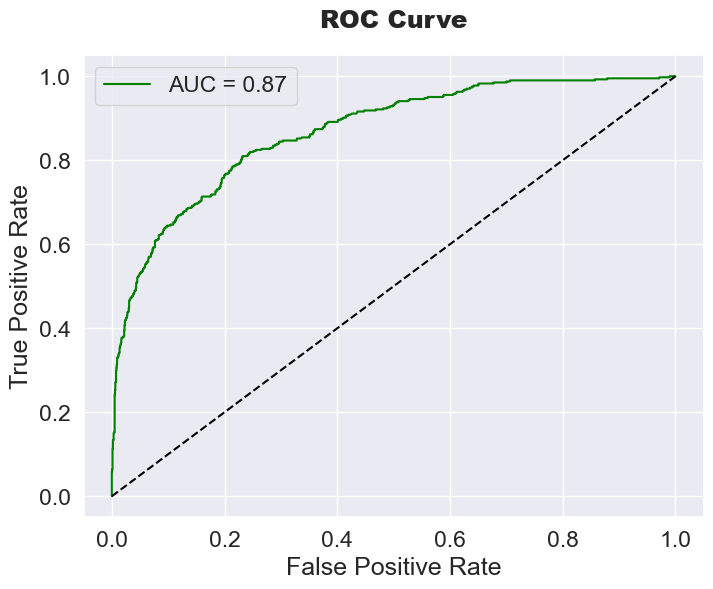

In [96]:
y_pred_proba = rfc.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()

<h2>Logistic Regression

In [98]:

from sklearn.model_selection import RandomizedSearchCV

In [99]:
log_reg = LogisticRegression()

In [100]:
param_grid = {
    "penalty": ["l1", "l2", "elasticnet", "none"],  
    "C": [0.01, 0.1, 1, 10, 100],                   
    "solver": ["liblinear", "saga"],                
    "max_iter": [100, 200, 500],                    
    "random_state": [42]
}


In [101]:
random_search = RandomizedSearchCV(
    log_reg, param_grid, n_iter=20, cv=5, n_jobs=-1, random_state=42
)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100],
                                        'max_iter': [100, 200, 500],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'random_state': [42],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42)

In [102]:
best_parameters = random_search.best_params_
print("Best Parameters for Logistic Regression Model are:\n\n", best_parameters)

Best Parameters for Logistic Regression Model are:

 {'solver': 'liblinear', 'random_state': 42, 'penalty': 'l1', 'max_iter': 500, 'C': 10}


In [103]:
log_reg = LogisticRegression(**best_parameters)
log_reg.fit(x_train, y_train)

LogisticRegression(C=10, max_iter=500, penalty='l1', random_state=42,
                   solver='liblinear')

In [104]:
y_train_pred = log_reg.predict(x_train)
y_test_pred = log_reg.predict(x_test)

In [105]:
print("Accuracy Score of Model on Training Data is =>", round(accuracy_score(y_train, y_train_pred) * 100, 2), "%")
print("Accuracy Score of Model on Testing Data  is =>", round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print("F1 Score of the Model is =>", f1_score(y_test, y_test_pred, average="micro"))
print("Recall Score of the Model is =>", recall_score(y_test, y_test_pred, average="micro"))
print("Precision Score of the Model is =>", precision_score(y_test, y_test_pred, average="micro"))

Accuracy Score of Model on Training Data is => 84.02 %
Accuracy Score of Model on Testing Data  is => 84.35 %
F1 Score of the Model is => 0.8435
Recall Score of the Model is => 0.8435
Precision Score of the Model is => 0.8435


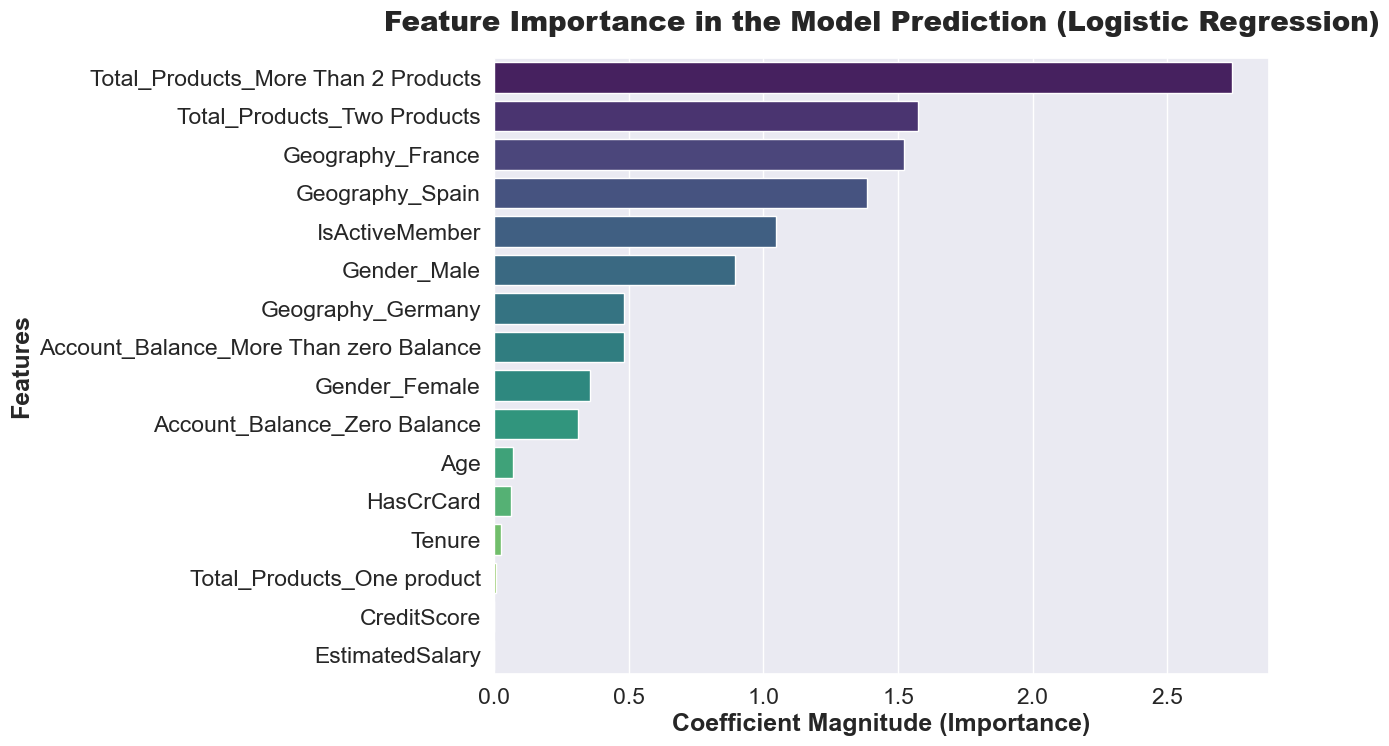

In [120]:

feature_importance = pd.DataFrame({
    "Feature": x_train.columns,
    "Importance": abs(log_reg.coef_[0]) 
})

# Sort by importance
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)


plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title("Feature Importance in the Model Prediction (Logistic Regression)", fontweight="black", size=20, pad=20)
plt.xlabel("Coefficient Magnitude (Importance)", fontweight="bold")
plt.ylabel("Features", fontweight="bold")
plt.show()


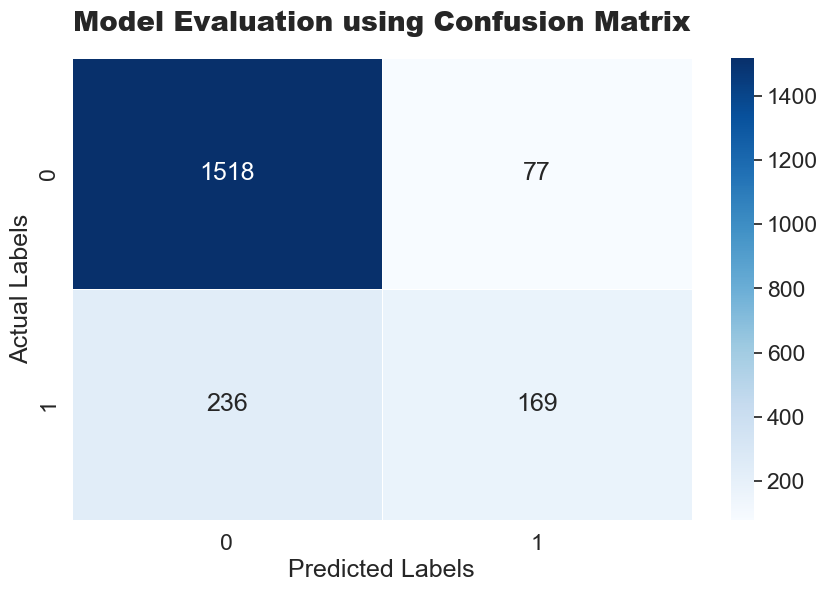

In [106]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(data=cm, linewidths=0.5, annot=True, fmt="g", cmap="Blues")
plt.title("Model Evaluation using Confusion Matrix", fontsize=20, pad=20, fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

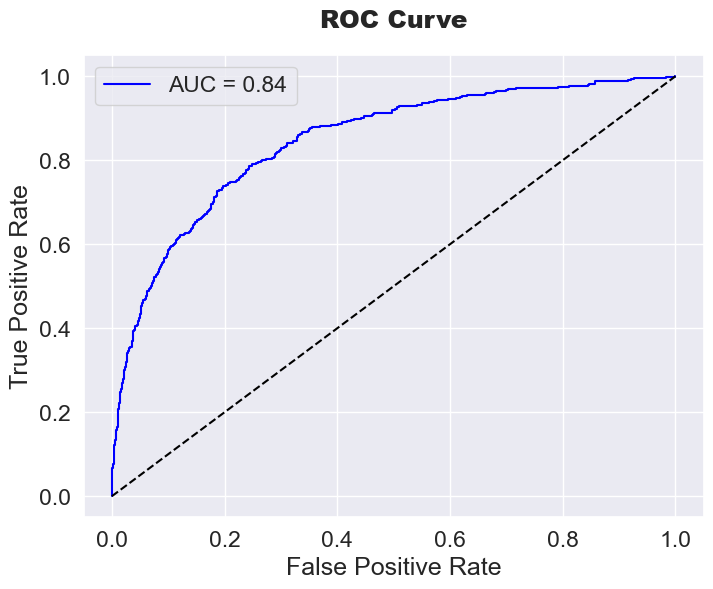

In [107]:
y_pred_proba = log_reg.predict_proba(x_test)[:, 1]  # Probability for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", pad=20, fontweight="black")
plt.legend()
plt.show()

<h2>Naive Bayes classifier

In [110]:
nb = GaussianNB()

In [111]:
param_grid = {
    "var_smoothing": np.logspace(-9, 0, 10)  # Variance smoothing values on a logarithmic scale
}

In [112]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(
    nb, param_grid, n_iter=10, cv=5, n_jobs=-1, random_state=42
)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])},
                   random_state=42)

In [113]:
best_parameters = random_search.best_params_
print("Best Parameters for Gaussian Naive Bayes Model are:\n\n", best_parameters)

Best Parameters for Gaussian Naive Bayes Model are:

 {'var_smoothing': 1e-07}


In [114]:
nb = GaussianNB(**best_parameters)
nb.fit(x_train, y_train)

GaussianNB(var_smoothing=1e-07)

In [115]:
y_train_pred = nb.predict(x_train)
y_test_pred = nb.predict(x_test)

In [116]:
print("Accuracy Score of Model on Training Data is =>", round(accuracy_score(y_train, y_train_pred) * 100, 2), "%")
print("Accuracy Score of Model on Testing Data is =>", round(accuracy_score(y_test, y_test_pred) * 100, 2), "%")
print("F1 Score of the Model is =>", f1_score(y_test, y_test_pred, average="micro"))
print("Recall Score of the Model is =>", recall_score(y_test, y_test_pred, average="micro"))
print("Precision Score of the Model is =>", precision_score(y_test, y_test_pred, average="micro"))

Accuracy Score of Model on Training Data is => 79.6 %
Accuracy Score of Model on Testing Data is => 79.75 %
F1 Score of the Model is => 0.7975
Recall Score of the Model is => 0.7975
Precision Score of the Model is => 0.7975


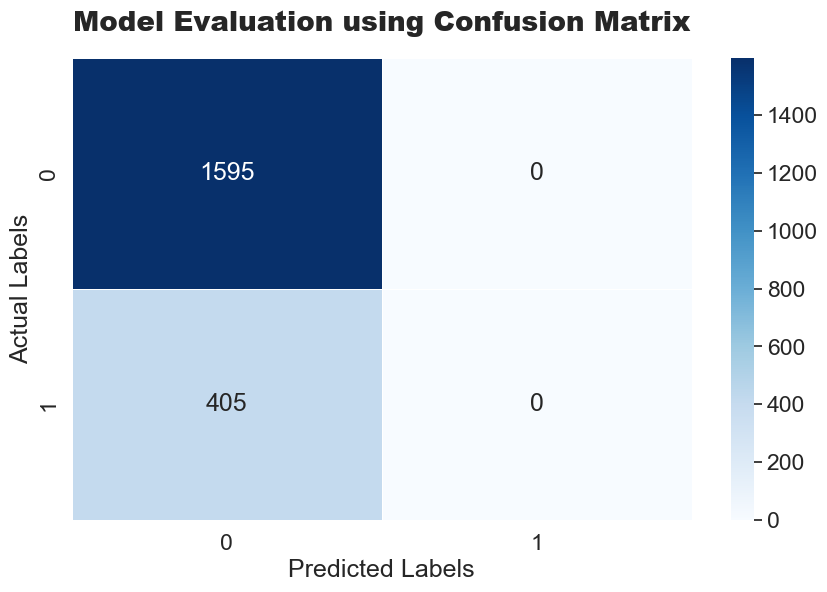

In [118]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(data=cm, linewidths=0.5, annot=True, fmt="g", cmap="Blues")
plt.title("Model Evaluation using Confusion Matrix", fontsize=20, pad=20, fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()


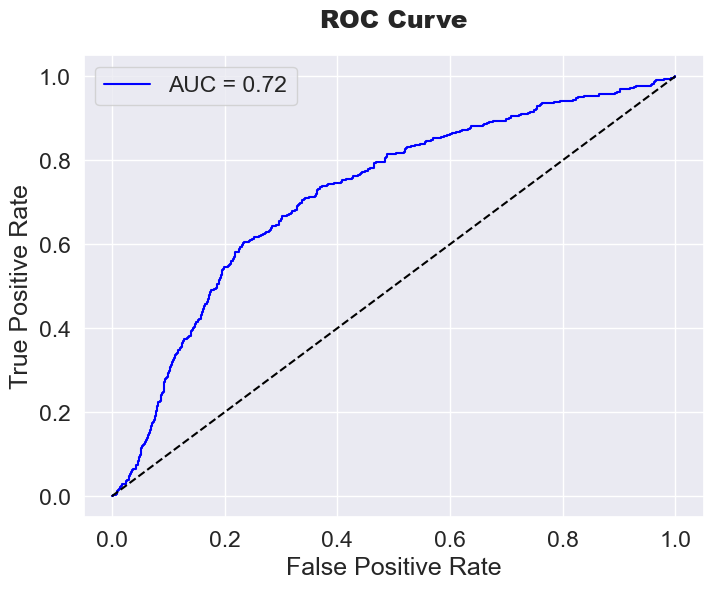

In [119]:
y_pred_proba = nb.predict_proba(x_test)[:, 1]  # Probability for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", pad=20, fontweight="black")
plt.legend()
plt.show()

In [ ]:
#The best model would be decision tree ,it has the highest Accuracy and Recall score.Since its a problem of churn missing 
#out on customers who might leave can be more costly because these  customers could be targeted with retention strategies. 